# Create plots from openebench results

In [13]:
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#read in json files
def read_json(file_path):
    file = open(file_path, 'r')
    data = json.loads(file)
    return data

In [8]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+0.02, point['y'], str(point['val']))

In [62]:
def all_json_to_dataframe(data_directory, challenge, x_value, y_value, error_bars = False, label_points = False):
    tools = []
    x_values = []
    x_errors = []
    y_values = []
    y_errors = []
    for filename in os.listdir(data_directory):
        if filename.endswith('.json'):
            with open(os.path.join(data_directory, filename), 'r') as file:
                data = json.load(file)
                for i in data:
                    try:
                        if i['challenge_id'] == challenge:
                            #tools.append(i['participant_id'])
                            metrics = i["metrics"]
                            if metrics['metric_id'] == x_value:
                                x_values.append(metrics['value'])
                                x_errors.append(metrics['stderr'])
                            else:
                                y_values.append(metrics['value'])
                                y_errors.append(metrics['stderr'])
                    except KeyError:
                        try:
                            #print(i)
                            if i["id"] == challenge:
                                tools.append(i['participants'][0])
                        except KeyError:
    
                            continue
    df_dict = {'x': x_values, 'y': y_values, 'tools': tools}
    df = pd.DataFrame(df_dict)
    df.sort_values(by=['tools'], inplace=True)
    # Plotting
    sns.set(style="whitegrid")

    plt.figure(figsize=(8, 6))
    # Scatterplot
    plot = sns.scatterplot(data = df, x='x', y='y', hue='tools', legend='full', style='tools', s=100)

    if error_bars == True:
        # Error bars for x
        for i, tool in enumerate(tools):
            plt.errorbar(x_values[i], y_values[i], xerr=x_errors[i], fmt='none', capsize=5, color='gray')
    
        # Error bars for y
        for i, tool in enumerate(tools):
            plt.errorbar(x_values[i], y_values[i], yerr=y_errors[i], fmt='none', capsize=5, color='gray')

    if label_points == True:
        label_point(df.x, df.y, df.tools, plot.figure.gca()) 

    plt.title(challenge)
    plt.xlabel(x_value)
    plt.ylabel(y_value)
    plt.legend(title='Tools', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    plt.tight_layout()
    #plt.show()
    plt.savefig('QfO_benchmarking_service_plots/' + challenge + '.png', dpi=900, bbox_inches='tight')                    
    return tools, x_values, y_values, x_errors, y_errors
                
                

['sonicparanoid', 'rsd', 'orthoinspector', 'orthofinder', 'metaphors', 'inparanoid', 'fDOG-Assembly_metaeuk', 'BUSCO_metaeuk', 'OMA_pairs', 'fDOG-Assembly_augustus', 'ensamble', 'bbh', 'panther', 'orthoffgc', 'hieranoid', 'domainoid', 'BUSCO_augustus'] [287, 271, 287, 287, 265, 285, 246, 253, 275, 262, 278, 281, 287, 274, 281, 289, 240] [0.99674163, 0.99654925, 0.99674163, 0.99674163, 0.99305344, 0.99671876, 0.99259679, 0.98444604, 0.99732263, 0.99078269, 0.98684546, 0.99667206, 0.99674163, 0.99658704, 0.99667206, 0.99676418, 0.96592838] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0.0034462439, 0.003649703, 0.0034462439, 0.0034462439, 0.006242683, 0.003470427, 0.0088916774, 0.013938295, 0.0033111189, 0.0094409748, 0.0094410438, 0.003519826, 0.0034462439, 0.0036097445, 0.003519826, 0.0034223955, 0.021999562]


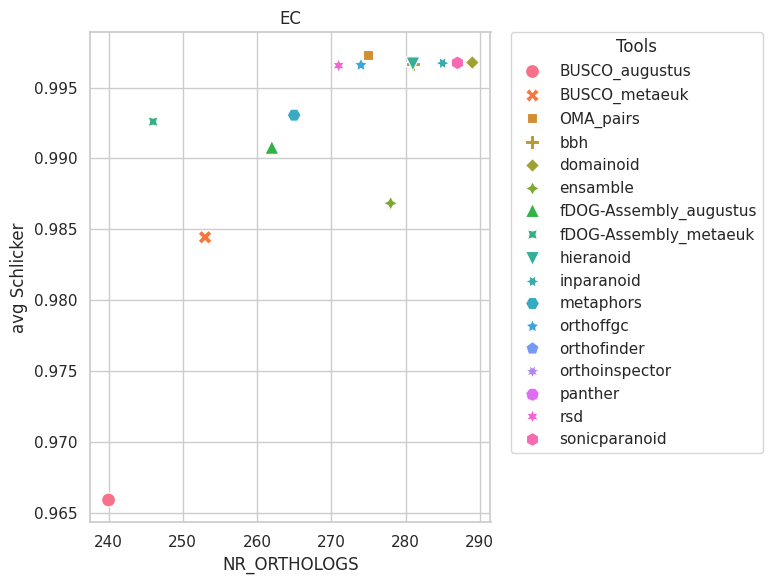

In [63]:
data_directory = "../openebench_output/with_new_chicken/"
tools, x_values, y_values, x_errors, y_errors = all_json_to_dataframe(data_directory, "EC", "NR_ORTHOLOGS", "avg Schlicker", error_bars=False, label_points=False)
print(tools, x_values, y_values, x_errors, y_errors)

['sonicparanoid', 'rsd', 'orthoinspector', 'orthofinder', 'metaphors', 'inparanoid', 'fDOG-Assembly_metaeuk', 'BUSCO_metaeuk', 'OMA_pairs', 'fDOG-Assembly_augustus', 'ensamble', 'bbh', 'panther', 'orthoffgc', 'hieranoid', 'domainoid', 'BUSCO_augustus'] [1071, 1023, 1065, 1067, 1067, 1029, 946, 1005, 979, 995, 1015, 1045, 1061, 980, 1019, 1061, 973] [0.53828292, 0.53717637, 0.53777219, 0.53655062, 0.53398708, 0.53750224, 0.53480934, 0.53385522, 0.5391645, 0.53378125, 0.53551794, 0.53822601, 0.53806423, 0.53761905, 0.53829849, 0.53810734, 0.52202145] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0.014398872, 0.014745572, 0.014471396, 0.014506484, 0.014562319, 0.014754889, 0.015365925, 0.014904888, 0.015080482, 0.014879763, 0.014849337, 0.01460558, 0.014439245, 0.014848296, 0.01477709, 0.014478587, 0.015325611]


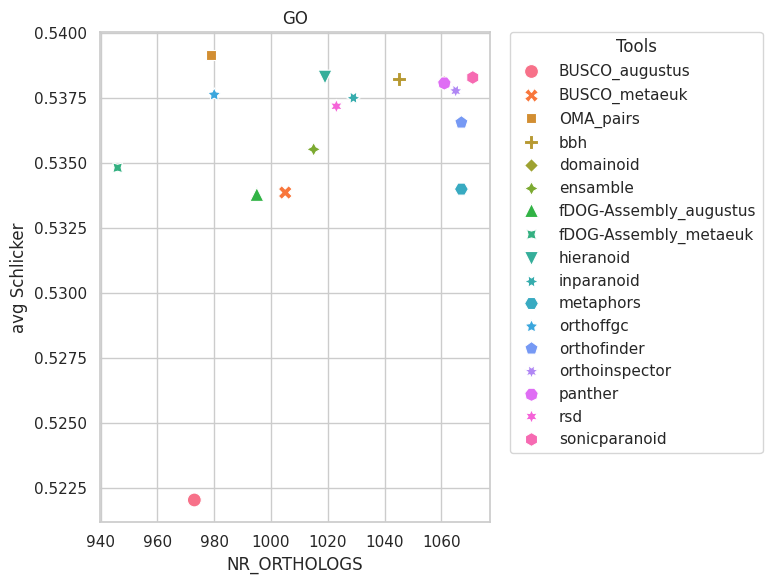

In [65]:
data_directory = "../openebench_output/with_new_chicken/"
tools, x_values, y_values, x_errors, y_errors = all_json_to_dataframe(data_directory, "GO", "NR_ORTHOLOGS", "avg Schlicker", error_bars=False, label_points=False)
print(tools, x_values, y_values, x_errors, y_errors)

['sonicparanoid', 'rsd', 'orthoinspector', 'orthofinder', 'metaphors', 'inparanoid', 'fDOG-Assembly_metaeuk', 'BUSCO_metaeuk', 'OMA_pairs', 'fDOG-Assembly_augustus', 'ensamble', 'bbh', 'panther', 'orthoffgc', 'hieranoid', 'domainoid', 'BUSCO_augustus'] [0.01670878, 0.01602586, 0.016754308, 0.016868128, 0.016640488, 0.016503904, 0.015024244, 0.015206356, 0.015411232, 0.015525052, 0.015980332, 0.016435612, 0.016663252, 0.015593344, 0.016299028, 0.01670878, 0.014159211] [0.95572917, 0.95392954, 0.95584416, 0.95489691, 0.95555556, 0.95772787, 0.95513748, 0.95428571, 0.95486601, 0.95518207, 0.95380435, 0.95502646, 0.95188557, 0.954039, 0.95466667, 0.95448635, 0.95839753] [0.0016951528, 0.0016607258, 0.0016974214, 0.0017030788, 0.0016917438, 0.0016849037, 0.001608809, 0.0016183804, 0.0016290767, 0.0016349869, 0.0016584035, 0.0016814724, 0.001692881, 0.0016385221, 0.0016745874, 0.0016951528, 0.0015624939] [0.020573905, 0.021390075, 0.020521701, 0.020650074, 0.020652711, 0.020270817, 0.0218276

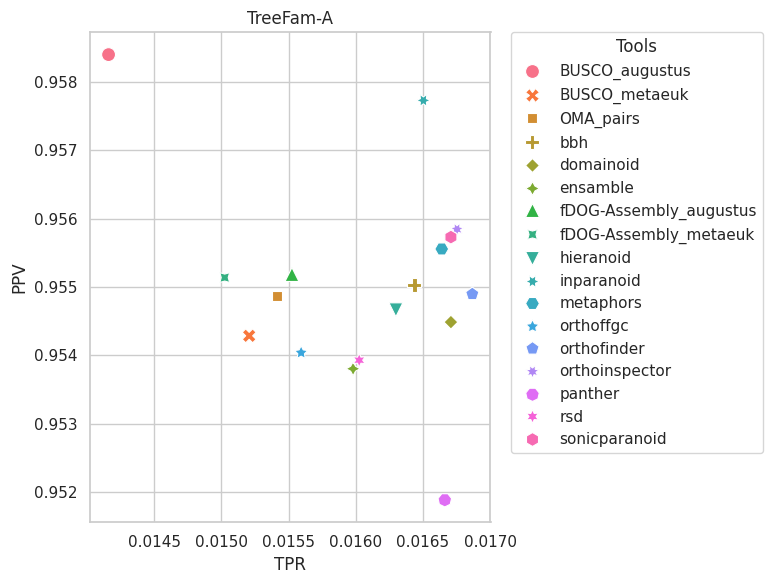

In [66]:
data_directory = "../openebench_output/with_new_chicken/"
tools, x_values, y_values, x_errors, y_errors = all_json_to_dataframe(data_directory, "TreeFam-A", "TPR", "PPV")
print(tools, x_values, y_values, x_errors, y_errors)

['sonicparanoid', 'rsd', 'orthoinspector', 'orthofinder', 'metaphors', 'inparanoid', 'fDOG-Assembly_metaeuk', 'BUSCO_metaeuk', 'OMA_pairs', 'fDOG-Assembly_augustus', 'ensamble', 'bbh', 'panther', 'orthoffgc', 'hieranoid', 'domainoid', 'BUSCO_augustus'] [0.031456831, 0.031456831, 0.031456831, 0.031456831, 0.031456831, 0.031456831, 0.031456831, 0.031456831, 0.031456831, 0.031456831, 0.031456831, 0.031456831, 0.031456831, 0.031456831, 0.031456831, 0.031456831, 0.031456831] [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5] [0.024544056, 0.024544056, 0.024544056, 0.024544056, 0.024544056, 0.024544056, 0.024544056, 0.024544056, 0.024544056, 0.024544056, 0.024544056, 0.024544056, 0.024544056, 0.024544056, 0.024544056, 0.024544056, 0.024544056] [0.16333333, 0.16333333, 0.16333333, 0.16333333, 0.16333333, 0.16333333, 0.16333333, 0.16333333, 0.16333333, 0.16333333, 0.16333333, 0.16333333, 0.16333333, 0.16333333, 0.16333333, 0.16333333, 0.16333333]


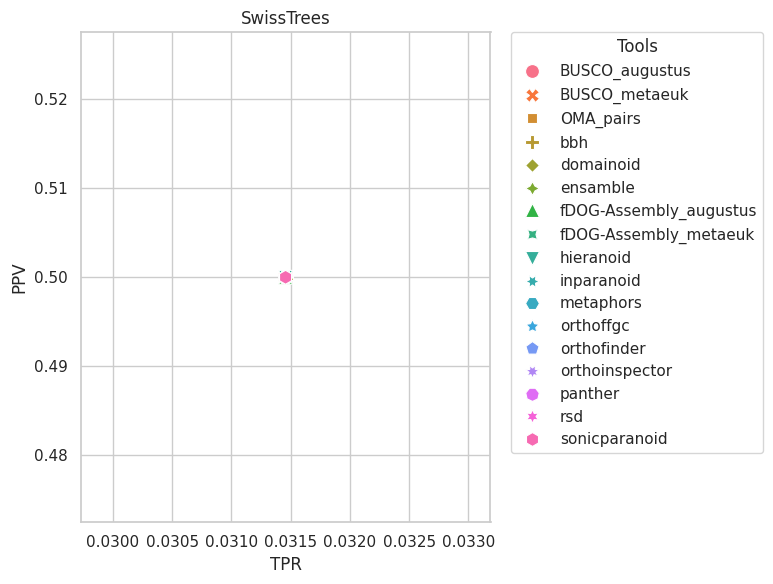

In [67]:
data_directory = "../openebench_output/with_new_chicken/"
tools, x_values, y_values, x_errors, y_errors = all_json_to_dataframe(data_directory, "SwissTrees", "TPR", "PPV")
print(tools, x_values, y_values, x_errors, y_errors)